## Food Security & Crop Yield Analysis – Karamoja Region (2017)

This project analyzes crop yield, production, and population data to evaluate:
- Productivity differences between Sorghum and Maize
- Food availability per person
- Food security risk patterns
- Statistical significance of yield differences

## Problem Context

Karamoja is one of the most food insecure regions of Uganda. Low crop productivity, driven by drought, pests, and disease outbreaks, contributes significantly to food shortages.

NGOs operating in the region lack comprehensive visibility into crop performance and food security conditions.

This analysis uses modeled satellite based yield estimates to identify vulnerable areas and inform targeted interventions.


### Importing Libraries

In [1550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load dataset

The dataset contains subcounty-level agricultural production data including:
- Crop yields (Sorghum, Maize)
- Production totals
- Population
- Derived food security indicators

In [1551]:
df1 = pd.read_csv("Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv")
df2 = pd.read_csv("Uganda_Karamoja_District_Crop_Yield_Population.csv")




In [1552]:
#Making copies of the data frames
df1copy=df1.copy()
df2copy=df1.copy()

## Understanding structure

To examine:

Column names,
Data types,
Missing values,
Summary statistics,
 identify data quality issues before analysis.

In [1553]:
df1.info()
df1.describe()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64

In [1554]:
print(df1.columns)
print(df2.columns)

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')
Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')


## Handle missing values


Replacing missing numeric values with the median to Preserve dataset size and 
reduce bias from extreme values


In [1555]:
df1 = df1.dropna()
df1.shape

(52, 13)

In [1556]:
df2 = df2.dropna()
df2.shape

(7, 11)

In [1557]:
# Fill numeric missing values using median

df1_clean = df1.copy()

numeric_cols = df1_clean.select_dtypes(include='number').columns

df1_clean[numeric_cols] = df1_clean[numeric_cols].fillna(df1_clean[numeric_cols].median())


In [1558]:
df1_clean = df2.copy()

numeric_cols = df2_clean.select_dtypes(include='number').columns

df1_clean[numeric_cols] = df2_clean[numeric_cols].fillna(df2_clean[numeric_cols].median())

#### Removing duplicate records to prevent double counting

In [1559]:
df1_clean = df1_clean.drop_duplicates()
df2_clean = df2_clean.drop_duplicates()

In [1560]:
df1_clean.dtypes


OBJECTID          int64
NAME             object
POP               int64
Area              int64
S_Yield_Ha        int64
M_Yield_Ha        int64
Crop_Area_Ha    float64
S_Area_Ha       float64
M_Area_Ha       float64
S_Prod_Tot        int64
M_Prod_Tot        int64
dtype: object

## Identifying outlier

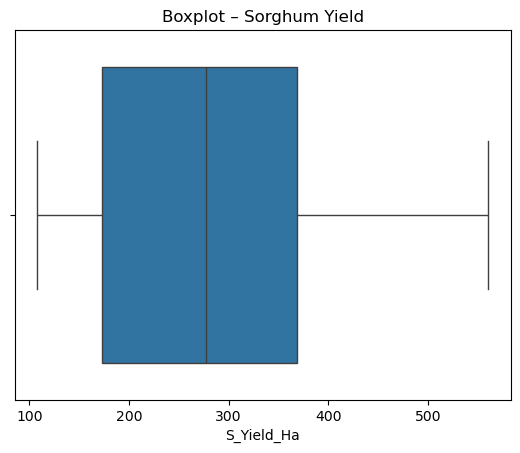

In [1561]:
plt.figure()
sns.boxplot(x=df1["S_Yield_Ha"])
plt.title("Boxplot – Sorghum Yield")
plt.show()

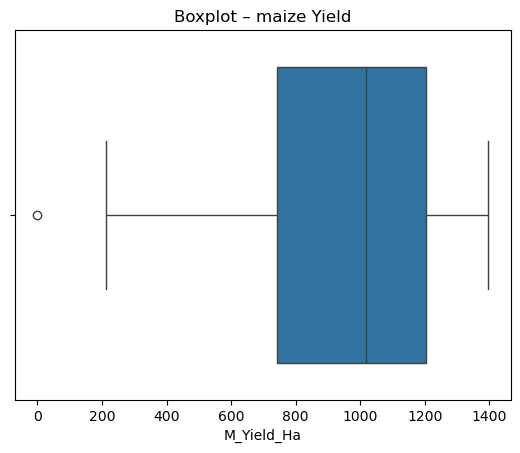

In [1562]:
plt.figure()
sns.boxplot(x=df1["M_Yield_Ha"])
plt.title("Boxplot – maize Yield")
plt.show()

In [1563]:
df1.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [1564]:
df1["Total_Production"] = df1["S_Prod_Tot"] + df1["M_Prod_Tot"]


In [1565]:
df1[["S_Prod_Tot", "M_Prod_Tot", "Total_Production"]].head()


,S_Prod_Tot,M_Prod_Tot,Total_Production
0,2.279092e+06,600723.892900,2.879816e+06
1,4.582294e+06,959201.382500,5.541496e+06
2,5.614765e+05,9991.488268,5.714680e+05
3,1.915696e+06,38971.659080,1.954668e+06
4,3.779939e+06,221609.511400,4.001549e+06


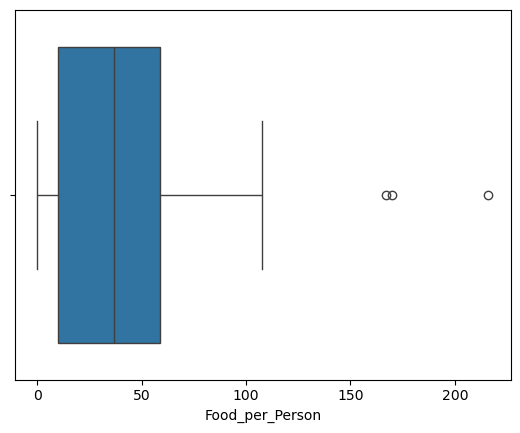

In [1566]:
# Clean column names
df1.columns = df1.columns.str.strip()

# Ensure Total_Production exists
if "Total_Production" not in df1.columns:
    df1["Total_Production"] = df1["S_Prod_Tot"] + df1["M_Prod_Tot"]

# Ensure Food_per_Person exists
if "Food_per_Person" not in df1.columns:
    df1["Food_per_Person"] = df1["Total_Production"] / df1["POP"]

# Plot
sns.boxplot(x=df1["Food_per_Person"])
plt.show()


In [1567]:
df1.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,Total_Production,Food_per_Person
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05,1.205817e+06,46.056264
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05,1.347164e+06,45.930606
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00,1.967487e+01,0.006013
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04,3.622575e+05,9.719828
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05,5.903609e+05,36.817439
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05,1.546602e+06,58.795656
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06,5.596386e+06,216.034970


### Introduced total product

In [1568]:
## created new variables to better measure food security dynamics.
## combined sorghum and maize production to estimate total staple crop production per subcounty

df1["Total_Production"] = df1["S_Prod_Tot"] + df1["M_Prod_Tot"]

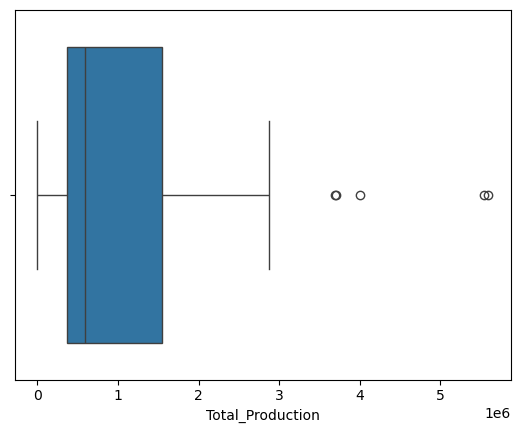

In [1569]:
sns.boxplot(x=df1["Total_Production"])
plt.show()

## Function to cap outliers using the IQR method

In [1570]:

# caping outliers using the IQR method instead of deleting data by identifies extreme values.

Q1 = df1_clean["M_Yield_Ha"].quantile(0.25)
Q3 = df1_clean["M_Yield_Ha"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df1_clean = df1_clean[(df1_clean["M_Yield_Ha"] >= lower) & 
                      (df1_clean["M_Yield_Ha"] <= upper)]


In [1571]:
df1["S_Yield_Ha"] = cap_outliers_iqr(df1["S_Yield_Ha"])
df1["M_Yield_Ha"] = cap_outliers_iqr(df1["M_Yield_Ha"])
df1["S_Prod_Tot"] = cap_outliers_iqr(df1["S_Prod_Tot"])
df1["M_Prod_Tot"] = cap_outliers_iqr(df1["M_Prod_Tot"])
df1["Total_Production"] = cap_outliers_iqr(df1["Total_Production"])
df1["Food_per_Person"] = cap_outliers_iqr(df1["Food_per_Person"])


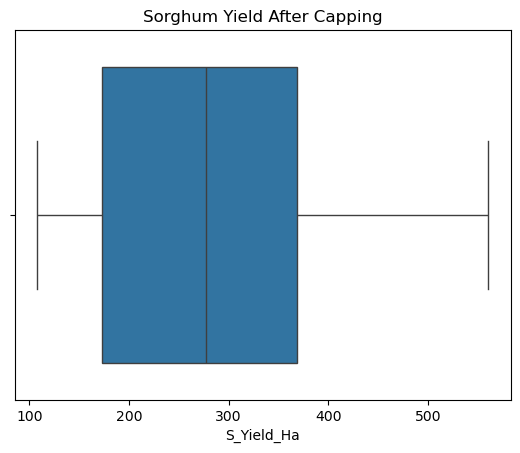

In [1572]:
sns.boxplot(x=df1["S_Yield_Ha"])
plt.title("Sorghum Yield After Capping")
plt.show()

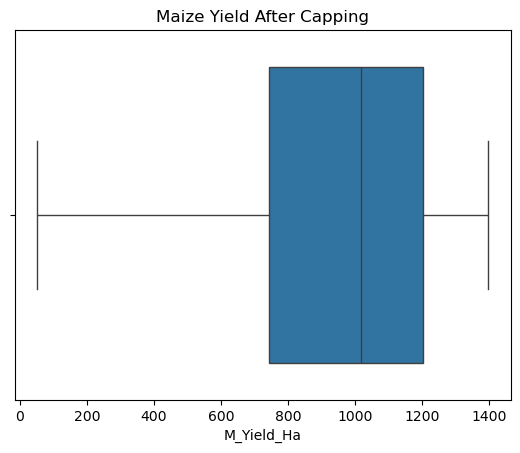

In [1573]:
sns.boxplot(x=df1["M_Yield_Ha"])
plt.title("Maize Yield After Capping")
plt.show()

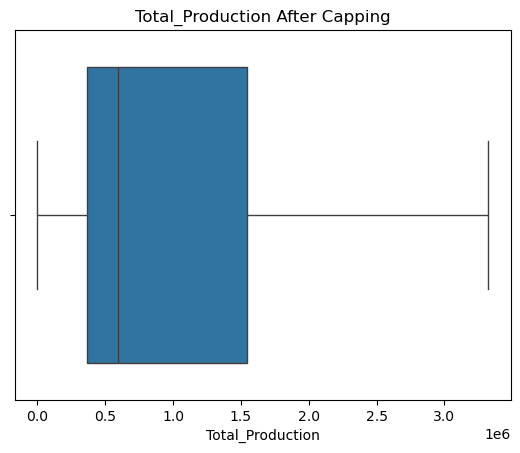

In [1574]:
sns.boxplot(x=df1["Total_Production"])
plt.title("Total_Production After Capping")
plt.show()

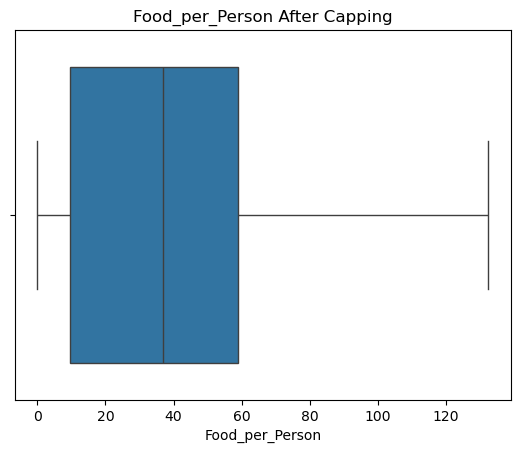

In [1575]:
sns.boxplot(x=df1["Food_per_Person"])
plt.title("Food_per_Person After Capping")
plt.show()

#### Total Production

In [1576]:
## created new variables to better measure food security dynamics.
## combined sorghum and maize production to estimate total staple crop production per subcounty

df1["Total_Production"] = df1["S_Prod_Tot"] + df1["M_Prod_Tot"]

#### Food per Person

In [1577]:
# divide production by population.
# This approximates food availability pressure.

df1["Food_per_Person"] = df1["Total_Production"] / df1["POP"]


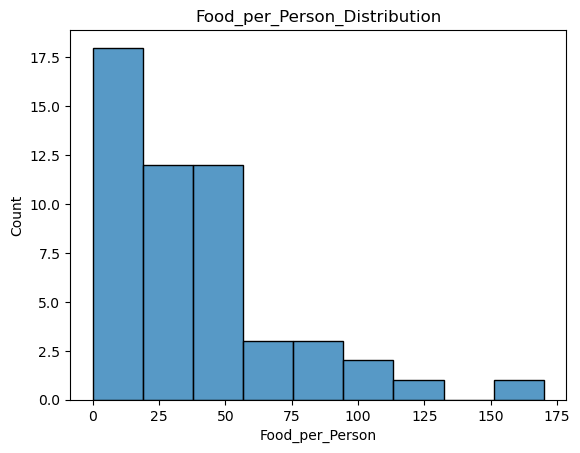

In [1578]:
sns.histplot(x=df1["Food_per_Person"])
plt.title("Food_per_Person_Distribution")
plt.show()

#### Yield Gap

In [1579]:
# Compared sorghum vs maize productivity.

df1["Yield_Gap"] = df1["S_Yield_Ha"] - df1["M_Yield_Ha"]


In [1580]:
df1["Yield_Gap"].describe()

count      52.000000
mean     -667.101199
std       261.397577
min     -1139.998067
25%      -814.654744
50%      -669.780106
75%      -534.873156
max        62.428869
Name: Yield_Gap, dtype: float64

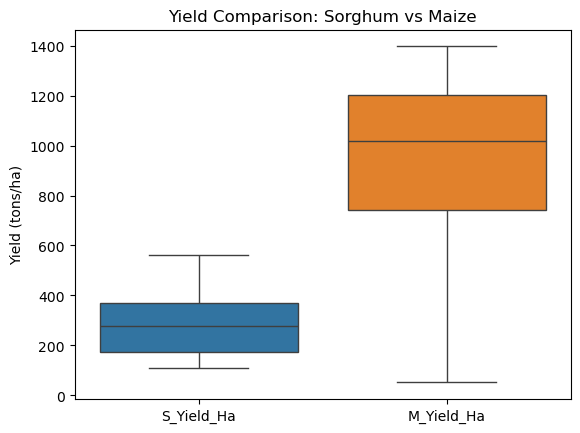

In [1581]:
sns.boxplot(data=df1[["S_Yield_Ha", "M_Yield_Ha"]])
plt.title("Yield Comparison: Sorghum vs Maize")
plt.ylabel("Yield (tons/ha)")
plt.show()

#### Risk Classification

In [1582]:
# Food Security Risk Level
# classified subcounties relative to median food availability.

median_food = df1["Food_per_Person"].median()

df1["Risk_Level"] = np.where(
    df1["Food_per_Person"] < median_food,
    "High Risk",
    "Lower Risk"
)


In [1583]:
median_food = df1["Food_per_Person"].median()

df1["Risk_Level"] = np.where(
    df1["Food_per_Person"] < median_food,
    "High Risk",
    "Lower Risk"
)

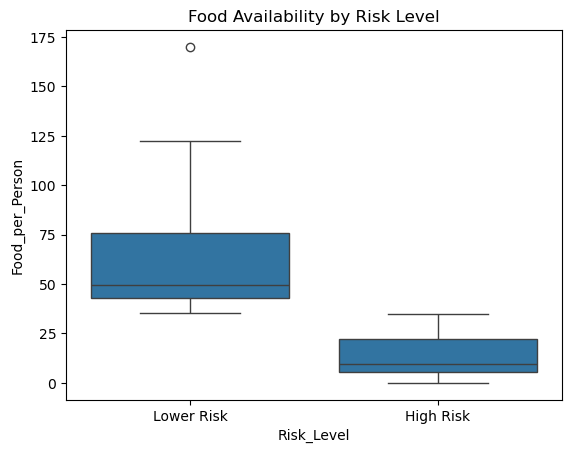

In [1603]:
sns.boxplot(x="Risk_Level", y="Food_per_Person", data=df1)

plt.title("Food Availability by Risk Level")
plt.show()

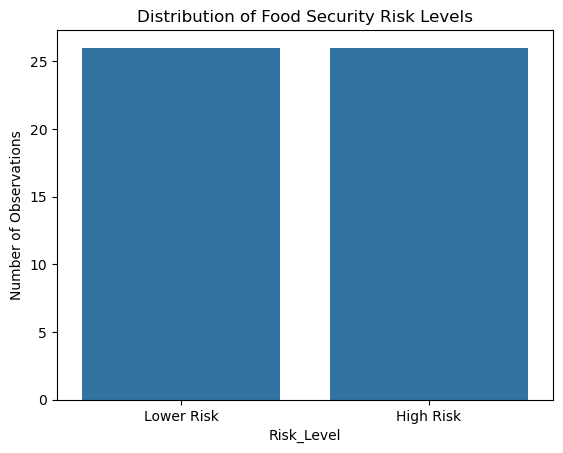

In [1585]:
sns.countplot(x="Risk_Level", data=df1)

plt.title("Distribution of Food Security Risk Levels")
plt.ylabel("Number of Observations")
plt.show()

#### Created key metricsto transforms raw production food security indicators.

In [1586]:


df1["Total_Production"] = (
    df1["S_Prod_Tot"] + df1["M_Prod_Tot"]
)

df1["Food_per_Person"] = (
    df1["Total_Production"] / df1["POP"]
)

df1[["Total_Production", "Food_per_Person"]].head()


,Total_Production,Food_per_Person
0,1.929376e+06,111.886807
1,2.287854e+06,43.354372
2,5.714680e+05,20.864872
3,1.367624e+06,35.270764
4,1.550262e+06,23.594632


In [1587]:
df1.columns = df1.columns.str.strip()


In [1588]:
print(df1.columns.tolist())


['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area', 'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot', 'Total_Production', 'Food_per_Person', 'Yield_Gap', 'Risk_Level']


#### Yield Distribution

Detect extreme food insecurity values

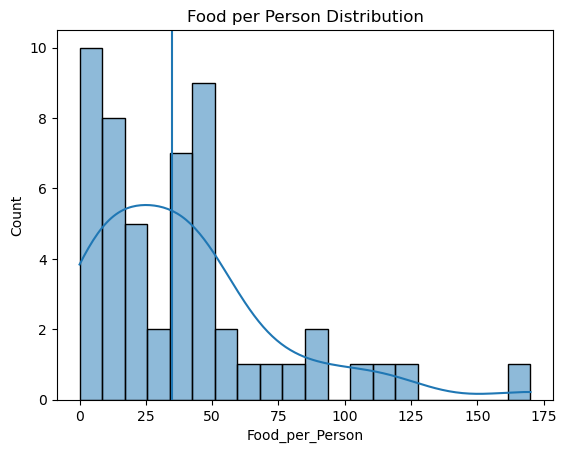

In [1589]:
sns.histplot(df1["Food_per_Person"], bins=20, kde=True)
plt.axvline(median_food)

plt.title("Food per Person Distribution")
plt.show()

#### performance differences to understand:

Which yield is higher on average?
Which crop/system performs better per Ha?
Which performs better under constraints

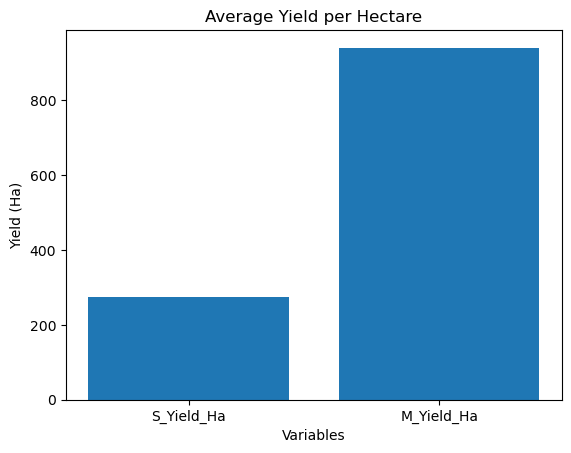

In [1590]:
means = df1[["S_Yield_Ha", "M_Yield_Ha"]].mean()

plt.figure()
plt.bar(means.index, means.values)
plt.title("Average Yield per Hectare")
plt.ylabel("Yield (Ha)")
plt.xlabel("Variables")
plt.show()

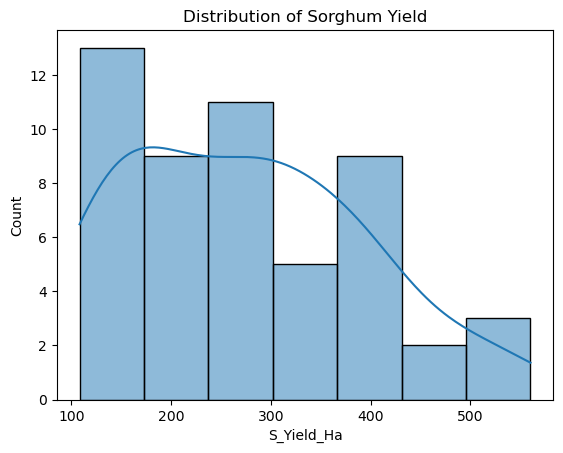

In [1591]:
## Sorghum Yield Distribution

sns.histplot(df1["S_Yield_Ha"], kde=True)
plt.title("Distribution of Sorghum Yield")
plt.show()


In [1592]:
df1[["S_Yield_Ha", "M_Yield_Ha"]].describe()


,S_Yield_Ha,M_Yield_Ha
count,52.000000,52.000000
mean,274.165405,941.266604
std,118.569907,318.708857
min,108.156411,52.366700
25%,173.034066,743.075879
50%,277.255206,1016.684002
75%,368.246437,1203.548665
max,560.313070,1396.991494


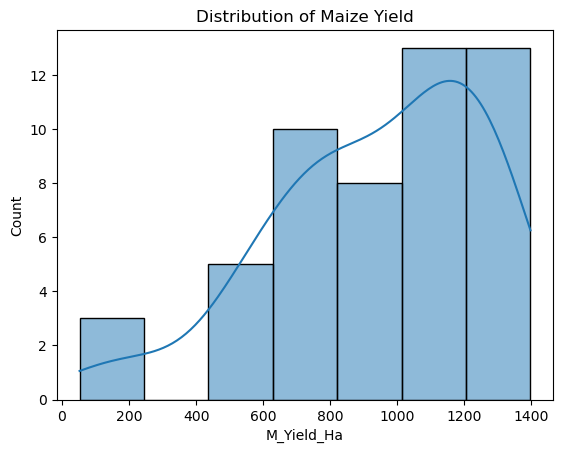

In [1593]:
sns.histplot(df1["M_Yield_Ha"], kde=True)
plt.title("Distribution of Maize Yield")
plt.show()

#### Hypothesis Test

In [1594]:
df1_test = df1[["S_Yield_Ha", "M_Yield_Ha"]].dropna()

t_stat, p_value = stats.ttest_rel(
    df1_test["S_Yield_Ha"],
    df1_test["M_Yield_Ha"]
)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -18.403135999026148
P-value: 3.592303734859358e-24


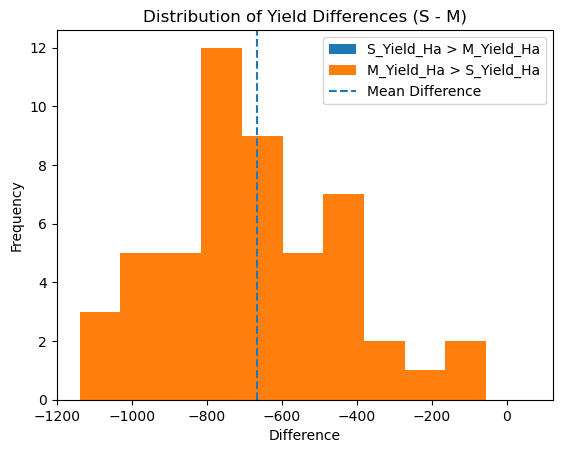

In [1595]:
plt.hist(diff[diff >= 0], label="S_Yield_Ha > M_Yield_Ha")
plt.hist(diff[diff < 0], label="M_Yield_Ha > S_Yield_Ha")

plt.axvline(diff.mean(), linestyle='--', label="Mean Difference")

plt.title("Distribution of Yield Differences (S - M)")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Production vs Population

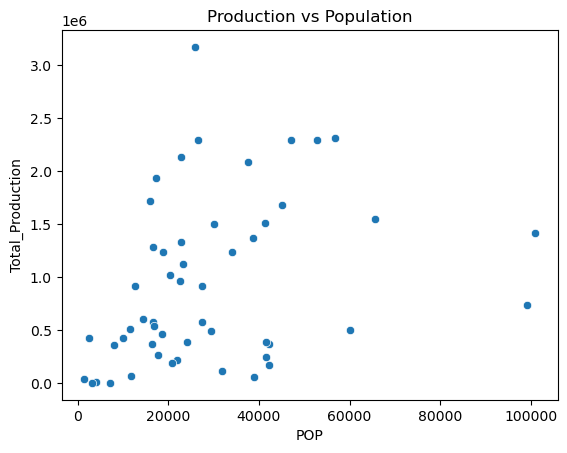

In [1596]:
sns.scatterplot(x="POP", y="Total_Production", data=df1)
plt.title("Production vs Population")
plt.show()


#### STATISTICAL TEST

In [1597]:
t_stat, p_value = stats.ttest_rel(df1["S_Yield_Ha"], df1["M_Yield_Ha"])

print("P-value:", p_value)



P-value: 3.592303734859358e-24


In [1598]:
if p_value < 0.05:
    print("Significant yield difference detected.")
else:
    print("No significant yield difference detected.")


Significant yield difference detected.


#### EXPORT FOR TABLEAU

In [1599]:
## Exporting Clean Dataset
## exporting the enriched dataset for Tableau visualization.

df1_clean.to_csv("karamoja_clean.csv", index=False)


In [1600]:
df1_clean.head()
df1_clean.shape


(6, 11)

In [1601]:
import os
os.getcwd()


'c:\\Users\\user\\Desktop\\Karamoja project'